In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

#load categorical
df_sampleinfo = pd.read_csv('gdrive/My Drive/sample_info.csv')

df_cat = df_sampleinfo[["DepMap_ID", "primary_disease"]]

Mounted at /content/gdrive


In [4]:
df_crisprdepend = pd.read_csv('gdrive/My Drive/CRISPR_gene_dependency.csv')

df_crisprdepend = pd.merge(df_crisprdepend, df_cat, how='inner', on=["DepMap_ID"])
df_crisprdepend

,DepMap_ID,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),...,ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009),primary_disease
0,ACH-000001,0.094568,0.012519,0.027460,0.025962,0.073412,0.027340,0.020199,0.284733,0.022084,...,0.080585,0.034309,0.007142,0.004241,0.082956,0.012000,0.003592,0.012679,0.324623,Ovarian Cancer
1,ACH-000004,0.012676,0.049011,0.075933,0.033215,0.013176,0.097497,0.005015,0.153166,0.007358,...,0.230569,0.007125,0.021209,0.011203,0.060266,0.128375,0.005911,0.004645,0.042530,Leukemia
2,ACH-000005,0.053957,0.027968,0.010139,0.005448,0.018599,0.081636,0.005457,0.159904,0.050884,...,0.274568,0.054525,0.033396,0.033416,0.034712,0.092832,0.012482,0.020843,0.050412,Leukemia
3,ACH-000007,0.026704,0.083588,0.008853,0.011299,0.027288,0.028349,0.032573,0.166503,0.047045,...,0.615338,0.011212,0.002200,0.005432,0.035241,0.138445,0.103161,0.146222,0.274833,Colon/Colorectal Cancer
4,ACH-000009,0.059383,0.051826,0.015370,0.011721,0.030062,0.078373,0.042128,0.184783,0.032335,...,0.405712,0.029011,0.002816,0.056461,0.189550,0.328064,0.035161,0.058402,0.269194,Colon/Colorectal Cancer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,ACH-002834,0.012720,0.083840,0.013308,0.013315,0.107286,0.079063,0.013340,0.717478,0.040061,...,0.636352,0.022403,0.052849,0.029567,0.029711,0.024132,0.174946,0.091510,0.421153,Bone Cancer
1082,ACH-002847,0.058547,0.079576,0.036707,0.030234,0.069976,0.032828,0.012784,0.476383,0.096910,...,0.967625,0.014249,0.018715,0.010776,0.072452,0.131375,0.115486,0.094022,0.438092,Unknown
1083,ACH-002874,0.169875,0.017430,0.017965,0.008615,0.117915,0.075693,0.087961,0.144152,0.140377,...,0.747477,0.045149,0.044243,0.017923,0.077515,0.094231,0.166188,0.058117,0.302708,Unknown
1084,ACH-002875,0.035519,0.099789,0.071748,0.048479,0.245413,0.154663,0.045155,0.324723,0.089083,...,0.168367,0.055878,0.039710,0.017571,0.101216,0.087739,0.050947,0.182081,0.349872,Unknown


In [5]:
df_crisprdepend = df_crisprdepend.dropna()
nullcheck = df_crisprdepend.isnull().sum()
check = [i for i in nullcheck if i>0]
check #checking data for null values

[]

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, MaxPooling2D, Conv2D
from tensorflow import keras

In [6]:
X = df_crisprdepend.iloc[:,1:-1]
y = df_crisprdepend.iloc[:,-1]
n_classes = len(df_crisprdepend['primary_disease'].unique())

encoder=LabelEncoder()
encoder.fit(y)
y=encoder.transform(y)
y = keras.utils.to_categorical(y, num_classes=n_classes)

In [7]:
y[0].shape

(31,)

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [9]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [10]:
X_train.shape[1]

17386

In [11]:
## Construct Network
model = keras.models.Sequential()
model.add(Dense(500, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(keras.layers.Dense(250, activation="relu"))
model.add(Dropout(0.25))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(Dropout(0.25))
model.add(keras.layers.Dense(n_classes, activation='softmax'))

In [12]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [13]:
model.layers

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               8693500   
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                                 
 dense_1 (Dense)             (None, 250)               125250    
                                                                 
 dropout_1 (Dropout)         (None, 250)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               25100     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 31)                3

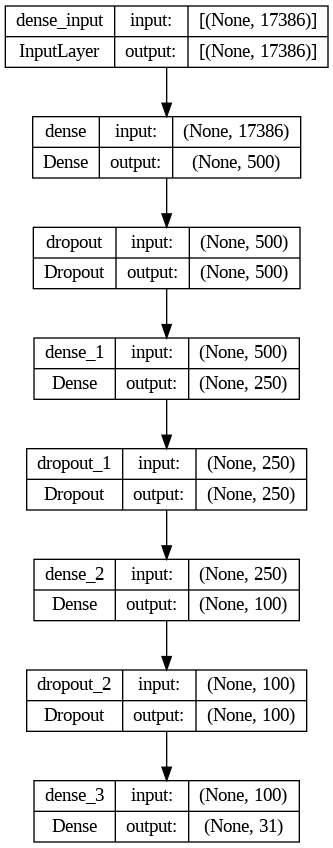

In [15]:
keras.utils.plot_model(model, "my_neural_net.png", show_shapes=True)

In [90]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model and saving metrics in history
history = model.fit(X_train, y_train,
          batch_size=64, epochs=150,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/150
14/14 [==============================] - 5s 289ms/step - loss: 4.0929 - accuracy: 0.0475 - val_loss: 3.3946 - val_accuracy: 0.1014
Epoch 2/150
14/14 [==============================] - 2s 178ms/step - loss: 3.4406 - accuracy: 0.0660 - val_loss: 3.3583 - val_accuracy: 0.1014
Epoch 3/150
14/14 [==============================] - 2s 175ms/step - loss: 3.3354 - accuracy: 0.0718 - val_loss: 3.2759 - val_accuracy: 0.0599
Epoch 4/150
14/14 [==============================] - 2s 178ms/step - loss: 3.2905 - accuracy: 0.1100 - val_loss: 3.2847 - val_accuracy: 0.1014
Epoch 5/150
14/14 [==============================] - 3s 202ms/step - loss: 3.2324 - accuracy: 0.1076 - val_loss: 3.1947 - val_accuracy: 0.1244
Epoch 6/150
14/14 [==============================] - 4s 279ms/step - loss: 3.1371 - accuracy: 0.1366 - val_loss: 3.0810 - val_accuracy: 0.1935
Epoch 7/150
14/14 [==============================] - 3s 214ms/step - loss: 3.0835 - accuracy: 0.1262 - val_loss: 3.0738 - val_accuracy: 0.2028

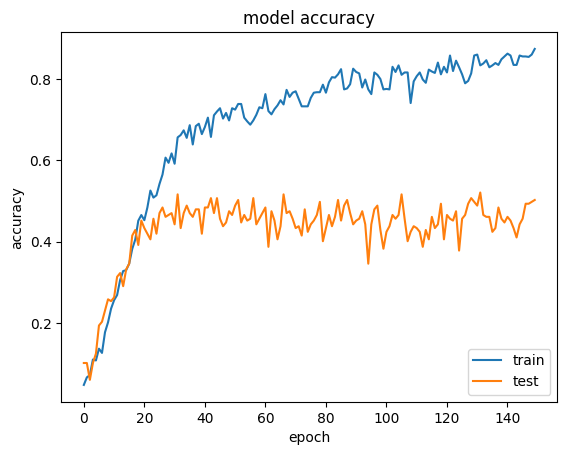

In [91]:
fig = plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

In [92]:
df_CCLEexpr = pd.read_csv('gdrive/My Drive/CCLE_expression.csv')
df_CCLEexpr = df_CCLEexpr.rename(columns={"Unnamed: 0": "DepMap_ID"})

df_CCLEexpr = pd.merge(df_CCLEexpr, df_cat, how='inner', on=["DepMap_ID"])
df_CCLEexpr

,DepMap_ID,TSPAN6 (7105),TNMD (64102),DPM1 (8813),SCYL3 (57147),C1orf112 (55732),FGR (2268),CFH (3075),FUCA2 (2519),GCLC (2729),...,H3C3 (8352),AC098582.1 (8916),DUS4L-BCAP29 (115253422),C8orf44-SGK3 (100533105),ELOA3B (728929),NPBWR1 (2831),ELOA3D (100506888),ELOA3 (162699),CDR1 (1038),primary_disease
0,ACH-001113,4.331992,0.000000,7.364397,2.792855,4.470537,0.028569,1.226509,3.042644,6.499686,...,0.189034,0.201634,2.130931,0.555816,0.000000,0.275007,0.0,0.000000,0.000000,Lung Cancer
1,ACH-001289,4.566815,0.584963,7.106537,2.543496,3.504620,0.000000,0.189034,3.813525,4.221104,...,1.049631,0.321928,1.464668,0.632268,0.000000,0.014355,0.0,0.000000,0.000000,Rhabdoid
2,ACH-001339,3.150560,0.000000,7.379032,2.333424,4.227279,0.056584,1.310340,6.687061,3.682573,...,1.097611,0.831877,2.946731,0.475085,0.000000,0.084064,0.0,0.000000,0.042644,Skin Cancer
3,ACH-001538,5.085340,0.000000,7.154109,2.545968,3.084064,0.000000,5.868143,6.165309,4.489928,...,0.632268,0.298658,1.641546,0.443607,0.000000,0.028569,0.0,0.000000,0.000000,Bile Duct Cancer
4,ACH-000242,6.729145,0.000000,6.537607,2.456806,3.867896,0.799087,7.208381,5.569856,7.127014,...,2.358959,0.084064,1.910733,0.000000,0.000000,0.464668,0.0,0.000000,0.000000,Bladder Cancer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,ACH-000285,0.056584,0.000000,6.604071,3.264536,4.972693,0.411426,0.097611,0.704872,4.829850,...,0.084064,1.310340,3.039138,0.344828,0.000000,0.000000,0.0,0.475085,0.042644,Lymphoma
1402,ACH-002669,3.109361,0.000000,7.031219,1.541019,3.664483,0.014355,3.624101,6.805292,4.472488,...,0.400538,0.356144,1.327687,0.000000,0.000000,0.014355,0.0,0.000000,0.000000,Colon/Colorectal Cancer
1403,ACH-001858,4.390943,0.000000,7.013127,1.887525,3.252476,0.028569,3.286881,6.902074,5.410748,...,0.400538,0.613532,1.992768,0.704872,0.000000,1.464668,0.0,0.000000,0.526069,Bile Duct Cancer
1404,ACH-001997,5.057017,0.000000,7.814935,2.538538,3.893362,0.028569,4.078951,6.971429,4.469886,...,0.847997,1.292782,2.153805,0.687061,0.000000,0.000000,0.0,0.000000,0.000000,Bile Duct Cancer


In [93]:
X = df_CCLEexpr.iloc[:,1:-1]
y = df_CCLEexpr.iloc[:,-1]
n_classes = len(df_CCLEexpr['primary_disease'].unique())

encoder=LabelEncoder()
encoder.fit(y)
y=encoder.transform(y)
y = keras.utils.to_categorical(y, num_classes=n_classes)

In [94]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [95]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [96]:
## Construct Network
model = keras.models.Sequential()
model.add(Dense(500, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(keras.layers.Dense(250, activation="relu"))
model.add(Dropout(0.25))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(Dropout(0.25))
model.add(keras.layers.Dense(n_classes, activation='softmax'))

In [97]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [98]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               9611000   
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                                 
 dense_1 (Dense)             (None, 250)               125250    
                                                                 
 dropout_1 (Dropout)         (None, 250)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               25100     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 33)                3

In [99]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model and saving metrics in history
history = model.fit(X_train, y_train,
          batch_size=64, epochs=150,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/150
18/18 [==============================] - 5s 227ms/step - loss: 4.8225 - accuracy: 0.0578 - val_loss: 3.3341 - val_accuracy: 0.2128
Epoch 2/150
18/18 [==============================] - 5s 277ms/step - loss: 3.2875 - accuracy: 0.1317 - val_loss: 2.9575 - val_accuracy: 0.2730
Epoch 3/150
18/18 [==============================] - 3s 177ms/step - loss: 2.9706 - accuracy: 0.2028 - val_loss: 2.6905 - val_accuracy: 0.3085
Epoch 4/150
18/18 [==============================] - 3s 178ms/step - loss: 2.7788 - accuracy: 0.2189 - val_loss: 2.4862 - val_accuracy: 0.3865
Epoch 5/150
18/18 [==============================] - 3s 178ms/step - loss: 2.6184 - accuracy: 0.2838 - val_loss: 2.2204 - val_accuracy: 0.4539
Epoch 6/150
18/18 [==============================] - 5s 279ms/step - loss: 2.3849 - accuracy: 0.3274 - val_loss: 2.0255 - val_accuracy: 0.4716
Epoch 7/150
18/18 [==============================] - 4s 212ms/step - loss: 2.2342 - accuracy: 0.3852 - val_loss: 1.8938 - val_accuracy: 0.4894

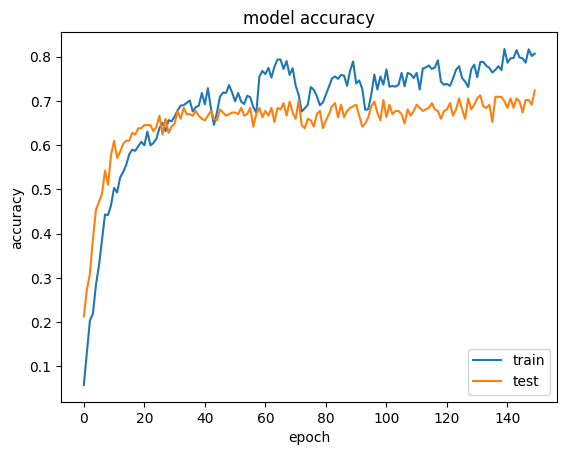

In [100]:
fig = plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

In [101]:
df_cat = df_sampleinfo[["DepMap_ID", "lineage"]]

In [102]:
df_crisprdepend = pd.read_csv('gdrive/My Drive/CRISPR_gene_dependency.csv')

df_crisprdepend = pd.merge(df_crisprdepend, df_cat, how='inner', on=["DepMap_ID"])
df_crisprdepend

,DepMap_ID,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),...,ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009),lineage
0,ACH-000001,0.094568,0.012519,0.027460,0.025962,0.073412,0.027340,0.020199,0.284733,0.022084,...,0.080585,0.034309,0.007142,0.004241,0.082956,0.012000,0.003592,0.012679,0.324623,ovary
1,ACH-000004,0.012676,0.049011,0.075933,0.033215,0.013176,0.097497,0.005015,0.153166,0.007358,...,0.230569,0.007125,0.021209,0.011203,0.060266,0.128375,0.005911,0.004645,0.042530,blood
2,ACH-000005,0.053957,0.027968,0.010139,0.005448,0.018599,0.081636,0.005457,0.159904,0.050884,...,0.274568,0.054525,0.033396,0.033416,0.034712,0.092832,0.012482,0.020843,0.050412,blood
3,ACH-000007,0.026704,0.083588,0.008853,0.011299,0.027288,0.028349,0.032573,0.166503,0.047045,...,0.615338,0.011212,0.002200,0.005432,0.035241,0.138445,0.103161,0.146222,0.274833,colorectal
4,ACH-000009,0.059383,0.051826,0.015370,0.011721,0.030062,0.078373,0.042128,0.184783,0.032335,...,0.405712,0.029011,0.002816,0.056461,0.189550,0.328064,0.035161,0.058402,0.269194,colorectal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,ACH-002834,0.012720,0.083840,0.013308,0.013315,0.107286,0.079063,0.013340,0.717478,0.040061,...,0.636352,0.022403,0.052849,0.029567,0.029711,0.024132,0.174946,0.091510,0.421153,bone
1082,ACH-002847,0.058547,0.079576,0.036707,0.030234,0.069976,0.032828,0.012784,0.476383,0.096910,...,0.967625,0.014249,0.018715,0.010776,0.072452,0.131375,0.115486,0.094022,0.438092,unknown
1083,ACH-002874,0.169875,0.017430,0.017965,0.008615,0.117915,0.075693,0.087961,0.144152,0.140377,...,0.747477,0.045149,0.044243,0.017923,0.077515,0.094231,0.166188,0.058117,0.302708,skin
1084,ACH-002875,0.035519,0.099789,0.071748,0.048479,0.245413,0.154663,0.045155,0.324723,0.089083,...,0.168367,0.055878,0.039710,0.017571,0.101216,0.087739,0.050947,0.182081,0.349872,skin


In [103]:
df_crisprdepend = df_crisprdepend.dropna()
nullcheck = df_crisprdepend.isnull().sum()
check = [i for i in nullcheck if i>0]
check #checking data for null values

[]

In [104]:
X = df_crisprdepend.iloc[:,1:-1]
y = df_crisprdepend.iloc[:,-1]
n_classes = len(df_crisprdepend['lineage'].unique())

encoder=LabelEncoder()
encoder.fit(y)
y=encoder.transform(y)
y = keras.utils.to_categorical(y, num_classes=n_classes)

In [105]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [106]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [107]:
## Construct Network
model = keras.models.Sequential()
model.add(Dense(500, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(keras.layers.Dense(250, activation="relu"))
model.add(Dropout(0.25))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(Dropout(0.25))
model.add(keras.layers.Dense(n_classes, activation='softmax'))

In [108]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [109]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               8693500   
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                                 
 dense_1 (Dense)             (None, 250)               125250    
                                                                 
 dropout_1 (Dropout)         (None, 250)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               25100     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 28)                2

In [110]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model and saving metrics in history
history = model.fit(X_train, y_train,
          batch_size=64, epochs=150,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/150
14/14 [==============================] - 6s 308ms/step - loss: 3.9859 - accuracy: 0.0463 - val_loss: 3.2644 - val_accuracy: 0.1014
Epoch 2/150
14/14 [==============================] - 3s 179ms/step - loss: 3.3293 - accuracy: 0.0671 - val_loss: 3.1866 - val_accuracy: 0.0783
Epoch 3/150
14/14 [==============================] - 3s 184ms/step - loss: 3.2112 - accuracy: 0.0938 - val_loss: 3.1978 - val_accuracy: 0.1014
Epoch 4/150
14/14 [==============================] - 2s 177ms/step - loss: 3.1614 - accuracy: 0.1007 - val_loss: 3.1449 - val_accuracy: 0.0783
Epoch 5/150
14/14 [==============================] - 3s 196ms/step - loss: 3.1148 - accuracy: 0.0914 - val_loss: 3.0951 - val_accuracy: 0.1290
Epoch 6/150
14/14 [==============================] - 4s 288ms/step - loss: 3.0918 - accuracy: 0.1100 - val_loss: 3.0963 - val_accuracy: 0.1014
Epoch 7/150
14/14 [==============================] - 3s 234ms/step - loss: 3.0418 - accuracy: 0.1204 - val_loss: 3.0751 - val_accuracy: 0.1152

In [111]:
df_CCLEexpr = pd.read_csv('gdrive/My Drive/CCLE_expression.csv')
df_CCLEexpr = df_CCLEexpr.rename(columns={"Unnamed: 0": "DepMap_ID"})

df_CCLEexpr = pd.merge(df_CCLEexpr, df_cat, how='inner', on=["DepMap_ID"])
df_CCLEexpr

,DepMap_ID,TSPAN6 (7105),TNMD (64102),DPM1 (8813),SCYL3 (57147),C1orf112 (55732),FGR (2268),CFH (3075),FUCA2 (2519),GCLC (2729),...,H3C3 (8352),AC098582.1 (8916),DUS4L-BCAP29 (115253422),C8orf44-SGK3 (100533105),ELOA3B (728929),NPBWR1 (2831),ELOA3D (100506888),ELOA3 (162699),CDR1 (1038),lineage
0,ACH-001113,4.331992,0.000000,7.364397,2.792855,4.470537,0.028569,1.226509,3.042644,6.499686,...,0.189034,0.201634,2.130931,0.555816,0.000000,0.275007,0.0,0.000000,0.000000,lung
1,ACH-001289,4.566815,0.584963,7.106537,2.543496,3.504620,0.000000,0.189034,3.813525,4.221104,...,1.049631,0.321928,1.464668,0.632268,0.000000,0.014355,0.0,0.000000,0.000000,soft_tissue
2,ACH-001339,3.150560,0.000000,7.379032,2.333424,4.227279,0.056584,1.310340,6.687061,3.682573,...,1.097611,0.831877,2.946731,0.475085,0.000000,0.084064,0.0,0.000000,0.042644,skin
3,ACH-001538,5.085340,0.000000,7.154109,2.545968,3.084064,0.000000,5.868143,6.165309,4.489928,...,0.632268,0.298658,1.641546,0.443607,0.000000,0.028569,0.0,0.000000,0.000000,bile_duct
4,ACH-000242,6.729145,0.000000,6.537607,2.456806,3.867896,0.799087,7.208381,5.569856,7.127014,...,2.358959,0.084064,1.910733,0.000000,0.000000,0.464668,0.0,0.000000,0.000000,urinary_tract
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,ACH-000285,0.056584,0.000000,6.604071,3.264536,4.972693,0.411426,0.097611,0.704872,4.829850,...,0.084064,1.310340,3.039138,0.344828,0.000000,0.000000,0.0,0.475085,0.042644,lymphocyte
1402,ACH-002669,3.109361,0.000000,7.031219,1.541019,3.664483,0.014355,3.624101,6.805292,4.472488,...,0.400538,0.356144,1.327687,0.000000,0.000000,0.014355,0.0,0.000000,0.000000,colorectal
1403,ACH-001858,4.390943,0.000000,7.013127,1.887525,3.252476,0.028569,3.286881,6.902074,5.410748,...,0.400538,0.613532,1.992768,0.704872,0.000000,1.464668,0.0,0.000000,0.526069,bile_duct
1404,ACH-001997,5.057017,0.000000,7.814935,2.538538,3.893362,0.028569,4.078951,6.971429,4.469886,...,0.847997,1.292782,2.153805,0.687061,0.000000,0.000000,0.0,0.000000,0.000000,bile_duct


In [112]:
X = df_CCLEexpr.iloc[:,1:-1]
y = df_CCLEexpr.iloc[:,-1]
n_classes = len(df_CCLEexpr['lineage'].unique())

encoder=LabelEncoder()
encoder.fit(y)
y=encoder.transform(y)
y = keras.utils.to_categorical(y, num_classes=n_classes)

In [113]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [114]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [115]:
## Construct Network
model = keras.models.Sequential()
model.add(Dense(500, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(keras.layers.Dense(250, activation="relu"))
model.add(Dropout(0.25))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(Dropout(0.25))
model.add(keras.layers.Dense(n_classes, activation='softmax'))

In [116]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [117]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               9611000   
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                                 
 dense_1 (Dense)             (None, 250)               125250    
                                                                 
 dropout_1 (Dropout)         (None, 250)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               25100     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 30)                3

In [118]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model and saving metrics in history
history = model.fit(X_train, y_train,
          batch_size=64, epochs=150,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/150
18/18 [==============================] - 7s 318ms/step - loss: 4.7216 - accuracy: 0.0463 - val_loss: 3.2722 - val_accuracy: 0.1028
Epoch 2/150
18/18 [==============================] - 4s 216ms/step - loss: 3.3002 - accuracy: 0.0801 - val_loss: 2.9836 - val_accuracy: 0.2340
Epoch 3/150
18/18 [==============================] - 3s 187ms/step - loss: 2.9935 - accuracy: 0.1637 - val_loss: 2.7016 - val_accuracy: 0.3333
Epoch 4/150
18/18 [==============================] - 4s 209ms/step - loss: 2.7196 - accuracy: 0.2295 - val_loss: 2.3874 - val_accuracy: 0.3617
Epoch 5/150
18/18 [==============================] - 5s 302ms/step - loss: 2.5697 - accuracy: 0.2758 - val_loss: 2.2863 - val_accuracy: 0.3475
Epoch 6/150
18/18 [==============================] - 3s 186ms/step - loss: 2.2978 - accuracy: 0.3363 - val_loss: 2.0168 - val_accuracy: 0.4433
Epoch 7/150
18/18 [==============================] - 3s 189ms/step - loss: 2.2369 - accuracy: 0.3434 - val_loss: 1.9274 - val_accuracy: 0.4681